# Image Segmentation

For this Notebook, we will look at some basic Image segmentation using some code that hase been adapted from

In [ ]:
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

In [7]:
from skimage import io
from matplotlib import pyplot as plt

image = io.imread('C:/Users/user/Desktop/seek_big_hole_2m1.jpg')

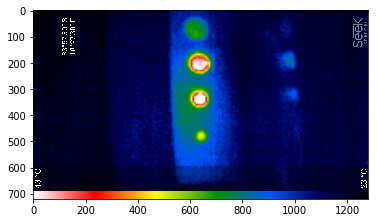

In [8]:
plt.imshow(image)

In [9]:
from skimage.color import rgb2gray # Convert colour image to viridis (default greyscale) 
virid = rgb2gray(image)
virid.max() # Indication of the maximum value of the image value

1.0

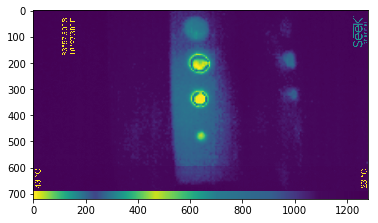

In [10]:
plt.imshow(virid)

Text(0.5,1,'histogram of gray values')

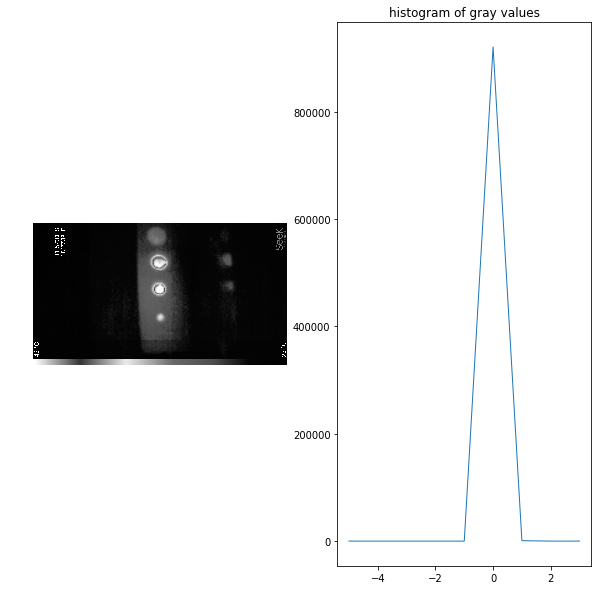

In [11]:
hist = np.histogram(virid, bins=np.arange(-5, 5))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(virid, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=1)
axes[1].set_title('histogram of gray values')

In [12]:
from skimage.feature import canny # Using Canny edge detector to get edges of the image
edges = canny(virid)

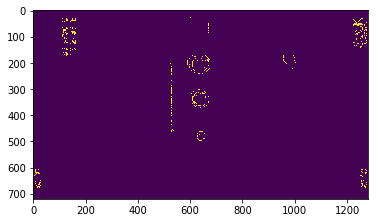

In [13]:
plt.imshow(edges)

In [15]:
from scipy import ndimage as ndi
fill_house = ndi.binary_fill_holes(edges) # Filling the holes of the image, but not used in segmentation

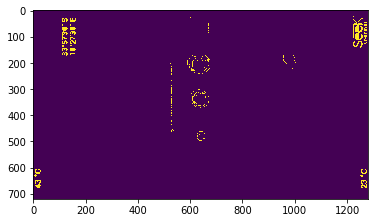

In [16]:
plt.imshow(fill_house)

In [17]:
label_objects, nb_labels = ndi.label(edges) # Any non-zero values in input are counted as features and zero values are considered the background
sizes = np.bincount(label_objects.ravel()) # flattening the array to create a 1D array
mask_sizes = sizes > 20 # creating a mask for the outlines of important features
mask_sizes[0] = 0 # ensures the first element is zero so as to remove the less fine detail/backgrand
house_cleaned = mask_sizes[label_objects]

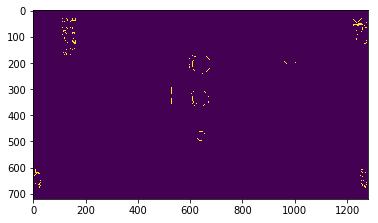

In [18]:
plt.imshow(house_cleaned)

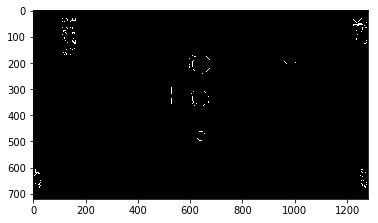

In [30]:
plt.imshow(house_cleaned, cmap='gray')

This method only shows edges well, but does not manage to show regions of where the anomalies are. For this, we will try Region based segmentation

# Region Based segmentation

In [19]:
markers = np.zeros_like(virid) # creating a zero matrix like the current image
markers[virid < 0.5] = 1 # All pixel values in Virid that are less than 0.5 must be equal to 1 in markers
markers[virid > 0.65] = 2 

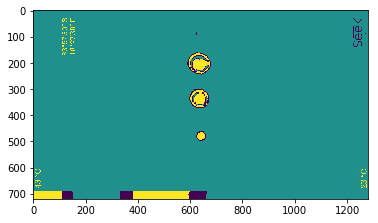

In [20]:
plt.imshow(markers)

In [22]:
from skimage.filters import sobel
elevation_map1 = sobel(virid) # use of the the Sobel filter to illuminate edges

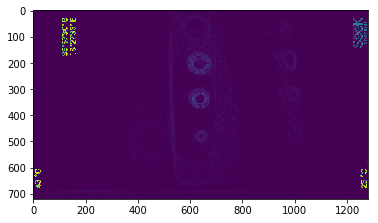

In [23]:
plt.imshow(elevation_map1)

In [24]:
from skimage.morphology import watershed
segmentation1 = watershed(elevation_map1, markers) # application of the watershed algorithim for segmentation

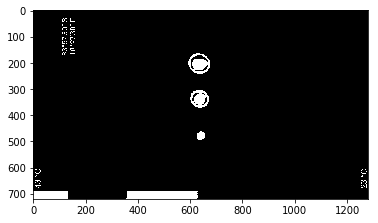

In [31]:
plt.imshow(segmentation1, cmap='gray')

In [26]:
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

In [27]:
labels = random_walker(elevation_map1, markers, beta=10000, mode='bf')

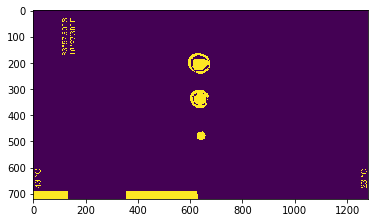

In [28]:
plt.imshow(labels)

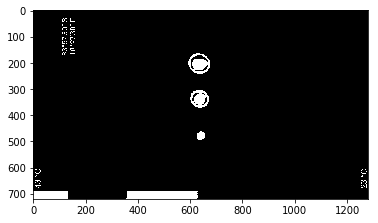

In [29]:
plt.imshow(segmentation1, cmap=plt.cm.gray)